# Análise de Microdados ENEM 2019

## Importação de dados

In [2]:
#Pacotes Utilizados
import pandas as pd         #biblioteca de código aberto para análise e manipulação de dados
import matplotlib as mpl    #biblioteca para criar visualizações

Devido a limitação de hardware, foi utilizado uma método diferente do usual para importar os dados. 
Com a hipótese formulada, podemos filtrar quais colunas vamos utilizar para investigação através do argumento usecols, economizando processamento e memória do computador. 
Outra alternativa seria diminuir o tamanho do dataset através das linhas com o argumento nrows.

In [3]:
caminho = "D:\ARQUIVOS\MICRODADOS_ENEM_2019.csv"    #path para importação de arquivos
colunas = ['NO_MUNICIPIO_RESIDENCIA', 'NU_IDADE', 'SG_UF_RESIDENCIA', 'IN_GESTANTE', 'TP_SEXO', 'SG_UF_RESIDENCIA',
'NU_NOTA_REDACAO', 'NU_INSCRICAO', 'NU_NOTA_MT', 'Q001', 'Q002']    #colunas selecionadas para importação
microdadosEnem = pd.read_csv(caminho, sep=';', encoding='ISO-8859-1', usecols=colunas) #microdados armazenado como data frame

In [3]:
#uma vez que os dados foram importados para a variável microdadosEnem, podemos visualizar as primeiras linhas do nosso data frame
microdadosEnem.head() #Método que mostra as primeiras do data frame.

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,Sorocaba,SP,36.0,M,0,NaN,NaN,B,B
1,190001421546,Feira de Santana,BA,23.0,M,0,NaN,NaN,C,E
2,190001133210,Fortaleza,CE,39.0,F,0,NaN,NaN,E,E
3,190001199383,Palmas,TO,25.0,F,0,392.0,460.0,C,E
4,190001237802,Contagem,MG,22.0,F,0,677.0,860.0,E,E


## Análisando os dados

Primeiramente, gostaria de saber quantos participantes existe por município. Cada linha do nosso data frame corresponde a um participante, portanto, contar o número de ocorrências de cada município vai responder a primeira pergunta. 

In [4]:
coluna_no_municipio_residencia = microdadosEnem['NO_MUNICIPIO_RESIDENCIA'] #Armazeno a coluna que contém o nome do município de residência em uma nova variável

In [7]:
coluna_no_municipio_residencia.value_counts().head(30) #O método value_counts() faz o trabalho de contar o número de ocorrências de cada município.

São Paulo                  229837
Rio de Janeiro             137762
Brasília                    94352
Fortaleza                   93959
Salvador                    88557
Manaus                      85305
Belo Horizonte              79384
Belém                       77105
São Luís                    67545
Recife                      54712
Goiânia                     48234
Teresina                    46814
Curitiba                    44463
João Pessoa                 37219
Maceió                      34635
Natal                       32695
Porto Alegre                30622
Campo Grande                28879
Macapá                      28581
Aracaju                     26445
Ananindeua                  25885
Rio Branco                  25261
Feira de Santana            25200
Guarulhos                   24925
Porto Velho                 24757
Cuiabá                      24227
Campina Grande              21735
Uberlândia                  21368
Campinas                    20866
Jaboatão dos G

In [6]:
coluna_no_municipio_residencia.value_counts().sort_index() #Acrescentando o método sort_index(), a contagem de municípios será apresentada em ordem alfabética.

Abadia de Goiás         283
Abadia dos Dourados     140
Abadiânia               280
Abaetetuba             6821
Abaeté                  495
                       ... 
Áurea                    68
Ângulo                   44
Érico Cardoso           127
Óbidos                 1313
Óleo                     46
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [7]:
#Vou aplicar o mesmo processo, mas dessa vez para a coluna idade.
coluna_nu_idade = microdadosEnem['NU_IDADE']

In [8]:
coluna_nu_idade.value_counts()

18.0    864186
17.0    847303
19.0    577161
20.0    409385
16.0    316437
         ...  
85.0         2
88.0         1
94.0         1
92.0         1
87.0         1
Name: NU_IDADE, Length: 82, dtype: int64

In [9]:
coluna_nu_idade.value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 82, dtype: int64

As células acima trouxeram os primeiros insights da análise. Com a contagem de ocorrências, descobrimos que a idade da maioria dos participantes é 18 anos. 

Com o método sort_index() apresentando os dados em ordem crescente, descobrimos que existem pessoas relativamente novas e de idade avançada que realizaram a a prova do enem em 2019.

Para facilitar a visualização, podemos plotar um gráfico de histograma.

<AxesSubplot:>

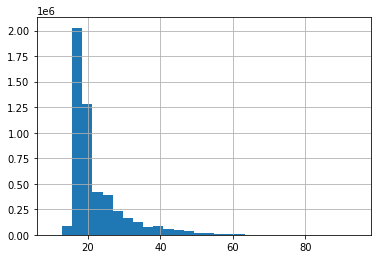

In [10]:
coluna_nu_idade.hist(bins=30) #.hist() plota o gráfico de histograma. O argumento bins aumenta o número de colunas do gráfico, resultando em uma melhor visualização.

In [11]:
#Agora, vamos investigar o número de participantes por estado
coluna_sg_uf_residencia = microdadosEnem['SG_UF_RESIDENCIA']

In [12]:
coluna_sg_uf_residencia.value_counts() #Aqui, descobrimos que o Estado com maior e menor frequência de participantes são Sâo Paulo e Roraima, respectivamente. 

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

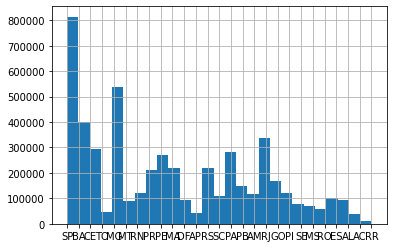

In [13]:
coluna_sg_uf_residencia.hist(bins=27)

Uma informação que gostaria de saber é o percentual de gestantes que realizaram o enem em 2019...

In [14]:
coluna_in_gestante = microdadosEnem['IN_GESTANTE']

In [15]:
distInGestante = coluna_in_gestante.value_counts() 

In [16]:
distInGestante #O resultado para esse contagem retorna 0 e 1, sendo 0 = falso e 1 = verdadeiro, ou seja, gestantes.

0    5093860
1       1410
Name: IN_GESTANTE, dtype: int64

In [17]:
percentInGestante = [100 * x / distInGestante.sum() for x in distInGestante]

In [18]:
percentInGestante

[99.97232727608154, 0.027672723918457705]

O resultado foi que aproximadamente 99,97% dos candidatos não são gestantes, enquanto aproximadamente 0,02% são gestantes. Entretanto, esse cálculo foi realizado em relação ao total de candidatos. A informação que procuramos talvez fosse mais precisa se o cálculo fosse em relação ao número de candidatas do sexo feminino.

In [19]:
coluna_tp_sexo = microdadosEnem['TP_SEXO']

In [20]:
distTpSexo = coluna_tp_sexo.value_counts()

In [21]:
distTpSexo #O resultado de pessoas que declaram o sexo feminino ou masculino nessa edição do enem.

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

In [22]:
percentTpSexo = [100*x/distTpSexo.sum() for x in distTpSexo]

In [23]:
percentTpSexo #o resultado apresentando como percentual. O maior percentual é do sexo feminino.

[59.50267601128105, 40.49732398871895]

In [24]:
sexoFeminino = distTpSexo[0]        #Número de candidatas do sexo feminino
nu_gestantes = distInGestante[1]    #Número de gestantes

In [25]:
percentGestantes = 100*nu_gestantes/sexoFeminino

In [26]:
percentGestantes #Esse é o resultado que procuramos. O percentual de gestantes em relação ao total de candidatas do sexo feminino.

0.04650668805754427

In [27]:
percentNaoGestantes = 100 - percentGestantes 

In [28]:
percentNaoGestantes #Para completar, o percentual de não gestantes.

99.95349331194245

A seguir, vou analisar os dados do Enem por declaração de sexo.

In [29]:
microdadosEnemSexoRedacao = microdadosEnem.filter(items=('TP_SEXO', 'NU_NOTA_REDACAO')) #armazenando em uma nova variável somente os dados que serão utilizados.

In [30]:
microdadosEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,NaN
3,F,460.0
4,F,860.0


O método head() mostra as primeiras linhas e percebemos que algumas delas possuem um valor NaN (Not a Number). Uma hipótese seria que o candidato/a não realizou a redação. Todavia, a presença desses valores NaN dificulta a manipulação e é necessário um tratamento. Para esse caso, vou escolher retirar as linhas que possuem o valor NaN na coluna correspondente a nota.


In [31]:
microdadosEnemSexoRedacao = microdadosEnemSexoRedacao.dropna()

In [32]:
microdadosEnemSexoRedacao.head()

,TP_SEXO,NU_NOTA_REDACAO
3,F,460.0
4,F,860.0
5,M,800.0
6,F,600.0
9,M,400.0


Feito isso, podemos trabalhar com o dataframe. Primeiramente, vendo a quantidade de candidatos pelo sexo declarado.

In [33]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').count() #objeto groupby() aglutina as linhas pelo mesmo valor de uma coluna declarada na função.

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


Qual sexo possui a maior a nota? Podemos investigar pela maior nota, menor, média ou mediana.

In [34]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [35]:
microdadosEnemSexoRedacao[microdadosEnemSexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min() #Mostra a menor nota que seja maior que zero.

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [36]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').mean() #A média por sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,577.159368
M,562.396035


In [37]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').median() #A mediana de cada sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,580.0


Por último, podemos plotar um histograma dos grupos.

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

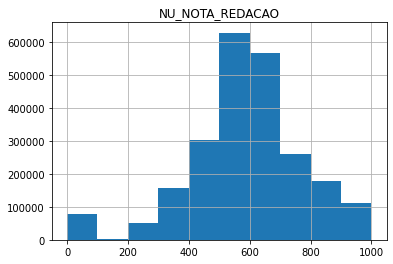

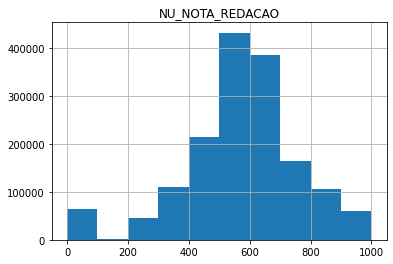

In [38]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').hist()

In [39]:
microdadosEnemSexoRedacao.groupby('TP_SEXO').describe() #Esse método descreve várias estatísticas do noso conjunto de dado.

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

## Análise de Indicadores Sócio Econômicos

Para este objetivo, será usado as questões 'Q001 - Até que série seu pai, ou homem responsáve por você, estudou?' e 'Q002 - Até que série sua mãe, ou mulher responsável por você, estudou?'
Para essas perguntas, as reposta variam entre as alternativas A a H, sendo:

A - Nunca estudou.

B - Não completou a 4ª série/5º ano do Ensino Fundamental.


C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.

D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.

E - Completou o Ensino Médio, mas não completou a Faculdade.

F - Completou a Faculdade, mas não completou a Pós-graduação.

G - Completou a Pós-graduação.

H - Não sei.


In [12]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'SG_UF_RESIDENCIA']
microdadosEnemSelecionado = microdadosEnem.filter(items=colunasSelecionadas)

In [41]:
microdadosEnemSelecionado.head() #Novamente, algumas colunas apresentam o valor NaN, que pode trazer dificuldades para a análise. Portanto, as observações que possuem esse valor serão retiradas

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
0,190001595656,NaN,NaN,B,B,SP
1,190001421546,NaN,NaN,C,E,BA
2,190001133210,NaN,NaN,E,E,CE
3,190001199383,392.0,460.0,C,E,TO
4,190001237802,677.0,860.0,E,E,MG


In [13]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

In [43]:
microdadosEnemSelecionado.head() #Dados limpos. 

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
3,190001199383,392.0,460.0,C,E,TO
4,190001237802,677.0,860.0,E,E,MG
5,190001782198,675.3,800.0,B,B,MT
6,190001421548,594.7,600.0,E,B,BA
9,190001592266,480.7,400.0,E,E,SP


Para trabalhar com as repostas das questões Q001 e Q002 será necessário criar uma variável dicionário, tornando mais fácil extrair informações do dataframe

In [14]:
#A partir desse dicionario, será criado uma nova coluna no dataframe
Q001Q002Dicionário = {"A":"Nunca estudou.",
"B":"Não completou a 4ª série/5º ano do Ensino Fundamental.",
"C":"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",
"D":"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",
"E":"Completou o Ensino Médio, mas não completou a Faculdade.",
"F":"Completou a Faculdade, mas não completou a Pós-graduação.",
"G":"Completou a Pós-graduação.",
"H":"Não sei."}

In [15]:
microdadosEnemSelecionado['NO_Q001'] = [Q001Q002Dicionário[resp] for resp in microdadosEnemSelecionado.Q001] #captura cada resposta da coluna Q001 e adiciona ao lado a resposta alternativa correspondente. 


In [16]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA,NO_Q001
3,190001199383,392.0,460.0,C,E,TO,"Completou a 4ª série/5º ano, mas não completou..."
4,190001237802,677.0,860.0,E,E,MG,"Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,MT,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,BA,"Completou o Ensino Médio, mas não completou a ..."
9,190001592266,480.7,400.0,E,E,SP,"Completou o Ensino Médio, mas não completou a ..."


In [17]:
microdadosEnemSelecionado['NO_Q002'] = [Q001Q002Dicionário[resp] for resp in microdadosEnemSelecionado.Q002]

In [18]:
microdadosEnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA,NO_Q001,NO_Q002
3,190001199383,392.0,460.0,C,E,TO,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
4,190001237802,677.0,860.0,E,E,MG,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,MT,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,BA,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
9,190001592266,480.7,400.0,E,E,SP,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


Com as novas colunas, podemos analisar a distribuição, comparar e verificar a relação da escolridade dos pais com as notas de matemática e redação

In [19]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)
#A tabela abaixo mostra a quantidade resposta para cada alternativa em relação a escolaridade dos pais.

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental.,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",433193
"Completou a Faculdade, mas não completou a Pós-graduação.",308319
Não sei.,306177
Completou a Pós-graduação.,193529
Nunca estudou.,186186


In [20]:
microdadosEnemSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)
#A tabela abaixo mostra a quantidade resposta para cada alternativa em relação a escolaridade das mãe.

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental.,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",471827
"Completou a Faculdade, mas não completou a Pós-graduação.",416291
Completou a Pós-graduação.,333159
Nunca estudou.,121022
Não sei.,97636


In [21]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)
#A tabela abaixo mostra nota média em matemática em relação a escolidade dos pais. A tabela indica que quanto maior a escolidade, maior a nota.

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,624.118011
"Completou a Faculdade, mas não completou a Pós-graduação.",600.305733
"Completou o Ensino Médio, mas não completou a Faculdade.",538.924218
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.746985
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",505.398424
Não sei.,495.478053
Não completou a 4ª série/5º ano do Ensino Fundamental.,486.456585
Nunca estudou.,466.098351


In [52]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)
#A tabela abaixo mostra nota média em matemática em relação a escolidade das mães. A tabela indica o mesmo comportamento

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,598.916796
"Completou a Faculdade, mas não completou a Pós-graduação.",583.324021
"Completou o Ensino Médio, mas não completou a Faculdade.",528.317356
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",505.045830
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",496.050296
Não sei.,484.997643
Não completou a 4ª série/5º ano do Ensino Fundamental.,480.071887
Nunca estudou.,459.859393


In [53]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
#A tabela abaixo mostra nota média na redação em relação a escolidade dos pais.

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,700.475174
"Completou a Faculdade, mas não completou a Pós-graduação.",673.474421
"Completou o Ensino Médio, mas não completou a Faculdade.",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",558.370329
Não sei.,537.062092
Não completou a 4ª série/5º ano do Ensino Fundamental.,532.604420
Nunca estudou.,496.082520


In [54]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
#A tabela abaixo mostra nota média na redação em relação a escolidade dos mães. 

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,700.475174
"Completou a Faculdade, mas não completou a Pós-graduação.",673.474421
"Completou o Ensino Médio, mas não completou a Faculdade.",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",558.370329
Não sei.,537.062092
Não completou a 4ª série/5º ano do Ensino Fundamental.,532.604420
Nunca estudou.,496.082520


In [22]:
q002Redacao = microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

<AxesSubplot:xlabel='NO_Q001'>

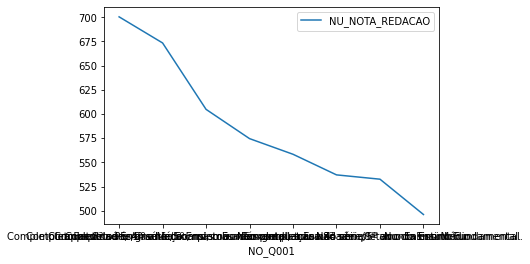

In [23]:
q002Redacao.plot() #O objetivo do plot e evidenciar a linearidade das notas com relação a escolidade.

In [57]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').describe() #Usando método describe() para ter outros insights. 
# Uma observação interessante é o fato de todos os grupos possuírem a nota máxima 1000. 

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        515785.0   
Completou a 8ª série/9º ano do Ensino Fundament...        433193.0   
Completou a Faculdade, mas não completou a Pós-...        308319.0   
Completou a Pós-graduação.                                193529.0   
Completou o Ensino Médio, mas não completou a F...       1006255.0   
Nunca estudou.                                            186186.0   
Não completou a 4ª série/5º ano do Ensino Funda...        752563.0   
Não sei.                                                  306177.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  558.370329  175.472064   
Completou a 8ª série/9º ano do Ensino Fundament...  574.553882  176.014692   
Completou a Faculdade, mas não completou a Pós-...  673.474421  170.940237   
Completou a Pós-graduação.                          700.475174  169.925860   
Completou o Ensino Médio, mas não completou a F...  604.810272  175.241446   
Nunca estudou.                                      496.082520  180.969010   
Não completou a 4ª série/5º ano do Ensino Funda...  532.604420  172.019074   
Não sei.                                            537.062092  182.576335   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  480.0  560.0  640.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  500.0  580.0  680.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  660.0  800.0   
Completou a Pós-graduação.                          0.0  600.0  700.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  520.0  600.0  700.0   
Nunca estudou.                                      0.0  420.0  520.0  600.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  460.0  560.0  620.0   
Não sei.                                            0.0  460.0  560.0  640.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                      1000.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei.                                            1000.0

## Dados do Questionário Sócioeconômico por Estados

Após evidenciar a linearidade da relação notas e escolidade dos pais no escopo global, seria interessante analisar se esse comportamento aparece quando reduzido o escopo para Estados.

In [24]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001'])\
    .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'RJ')\
    .groupby('NO_Q001')\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False) #O método where permite selecionar apenas as linhas que possuem A UF = RJ.

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,729.890766
"Completou a Faculdade, mas não completou a Pós-graduação.",695.613920
"Completou o Ensino Médio, mas não completou a Faculdade.",619.454588
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",586.662189
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",570.901664
Não sei.,556.111851
Não completou a 4ª série/5º ano do Ensino Fundamental.,545.532077
Nunca estudou.,508.685598


In [ ]:
microdadosEnemSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001'])\
    .where(microdadosEnemSelecionado.SG_UF_RESIDENCIA == 'SP')\
    .groupby('NO_Q001')\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,693.532224
"Completou a Faculdade, mas não completou a Pós-graduação.",667.770765
"Completou o Ensino Médio, mas não completou a Faculdade.",602.587417
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",575.267342
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",563.153352
Não sei.,543.965571
Não completou a 4ª série/5º ano do Ensino Fundamental.,539.419569
Nunca estudou.,498.693929


In [ ]:
microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'NO_Q001'])\
    .groupby(['SG_UF_RESIDENCIA', 'NO_Q001'])\
    .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q001                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       537.214580
                 Completou a 8ª série/9º ano do Ensino Fundament...       545.632554
                 Completou a Faculdade, mas não completou a Pós-...       617.245264
                 Completou a Pós-graduação.                               645.543672
                 Completou o Ensino Médio, mas não completou a F...       567.544698
...                                                                              ...
TO               Completou a Pós-graduação.                               682.030769
                 Completou o Ensino Médio, mas não completou a F...       580.978566
                 Nunca estudou.                                           473.613692
                 Não completou a 4ª série/5º ano do Ensino Funda...       515.779087
                 Não sei.                                                 526.654016

[216 rows x 1 columns]

A informação de notas e sua relação com a escolidade dos pais separada por Estados foi filtrada. Ainda assim, fica difícil ter uma noção de linearidade apenas com a tabela, devido o extenso número de linhas. Para facilitar a visualização, plotar um gráfico de linha ajudará.

In [9]:
import matplotlib.pyplot as plt #bibliteoca para plotar gráficos e customizá-los.

Text(0.5, 0, 'Escolaridade da mãe, ou mulher responsável, do candidato.')

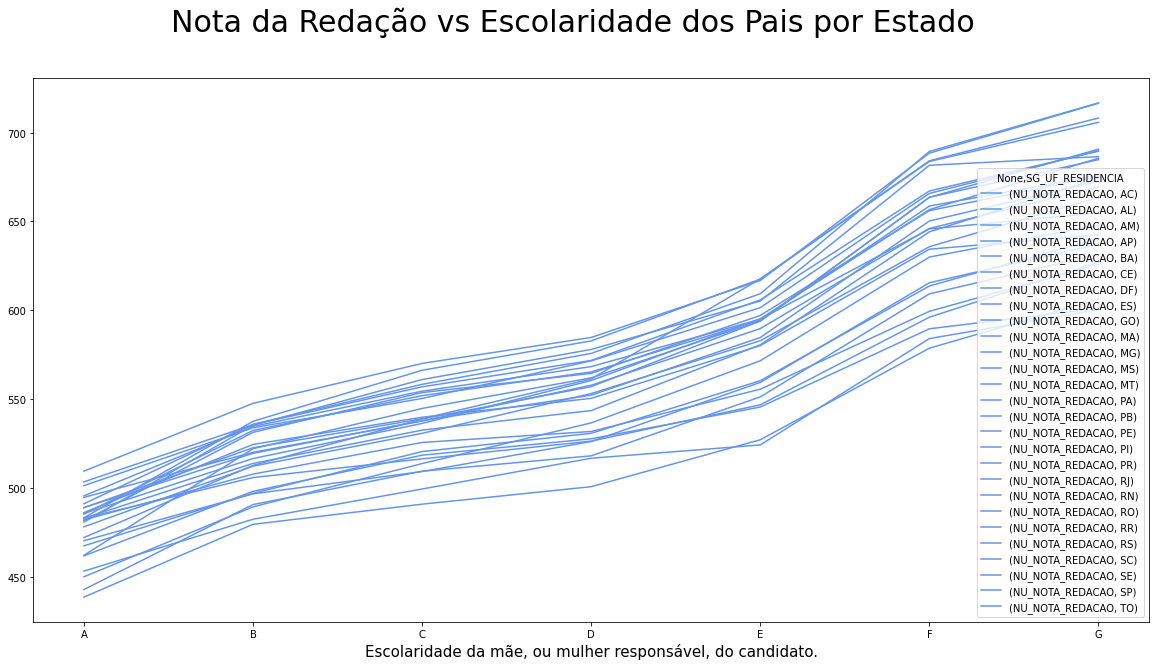

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))                #tamanho da figura
plt.suptitle('Nota da Redação vs Escolaridade dos Pais por Estado', size=30)   #título do gráfico

microdadosEnemSelecionado.filter(items=['SG_UF_RESIDENCIA', 'Q002', 'NU_NOTA_REDACAO'])\
    .where(microdadosEnemSelecionado.Q002 != 'H')\
    .groupby(['Q002', 'SG_UF_RESIDENCIA'])\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
    .unstack().plot(ax=ax, color='cornflowerblue')\
    .set_xlabel('Escolaridade da mãe, ou mulher responsável, do candidato.', size=15)
    
    #unstack significa desempilhar. O método plota todas as linhas separadas.

Temos um plot que mostra a tendência dos Estados. Porém Existe um pequeno enviesamento do gráfico por causa da alternativa H (não sei). Com não existe uma ordenação possível para ele, a alternativa foi omitida do gráfico.